In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import math

In [3]:
dist = pd.read_csv('../dist_data.csv', sep=';')

In [4]:
dist_clean = dist[dist['dist'] != "[[], []]"]

In [5]:
x = dist_clean.iloc[:, :-1].values
y = dist_clean.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [7]:
def clean_sample(sample):
    sample_list = sample[0].replace(', [', '; [').split(';')
    sample_x = sample_list[0]
    sample_Px = sample_list[1]

    sample_x_list = []
    sample_Px_list = []
    
    for x in sample_x.split(','):
        sample_x_list.append(x.replace(' ', '').replace('[', '').replace(']', ''))
    for Px in sample_Px.split(','):
        sample_Px_list.append(Px.replace(' ', '').replace('[', '').replace(']', ''))

    dict_sample = {}
    for i in range(len(sample_x_list)):
        dict_sample[sample_x_list[i]] = sample_Px_list[i]
    return dict_sample



# def all_keys_dataset1_exist_in_dataset2(dataset1, dataset2, threshold):
#     count = 0
#     total = len(dataset1.keys())
#     for key in dataset1.keys():
#         if dataset2.get(key) is None:
#             pass
#         else:
#             count += 1

#     if (count/total) * 100 >= float(threshold):
#         #print(count, (count/total) * 100, float(threshold))
#         return True
#     else:
#         return False


def preprocess_distros(distro1, distro2):
    label_distance = []
    for i, sample_x_test in enumerate(distro1):
        print(i)
        label_pre_distro = []
        for j, sample_x_train in enumerate(distro2):
            #distro1_with_all.append(aggregate_distro(clean_sample(sample_x_test), clean_sample(sample_x_train)))
            label_pre_distro.append([distro2_label[j], js(aggregate_distro(clean_sample(sample_x_test), clean_sample(sample_x_train)))])
        label_distance.append(label_pre_distro)
    return label_distance


def aggregate_distro(distro1, distro2):
    xPQx_dict={}
    for xd1, Pxd1 in distro1.items():
        if xd1 == "" or Pxd1 == "":
            continue
        Pxd2 = distro2.get(xd1)
        if Pxd2 is None:
            Pxd2 = 0.0
        xPQx_dict.update({xd1:[Pxd1, Pxd2]})
                    
    for xd2, Pxd2 in distro2.items():
        if xd2 == "" or Pxd2 == "":
            continue
        Pxd1 = distro1.get(xd2)
        if Pxd1 is None:
            Pxd1 = 0.0
            xPQx_dict.update({xd2:[0.0, Pxd2]})
    
    return xPQx_dict


def js(dict_distro):
    #dict_distro : {'443': [P443, Q443], '22': [P22, Q22]}
    PMQx_list = []
    for i in dict_distro.values():
        Mx = (float(i[0]) + float(i[1]))/2
        PMQx_list.append([float(i[0]), Mx, float(i[1])])

    PM_list = []
    QM_list = []
    for i in PMQx_list:
        PM_list.append([i[0], i[1]])
        QM_list.append([i[2], i[1]])

    sum1 = kl(PM_list)
    sum2 = kl(QM_list)

    return (sum1 + sum2)/2


def kl(PQx_list):
    sum = 0 
    for i in PQx_list:
        Pi = i[0]
        Qi = i[1]
        if float(Pi) == 0.0:
            sum += 0.0
            continue
        sum += float(Pi) * math.log2(float(Pi) / float(Qi))
        
    return sum

In [8]:
def Predict(label_distance, threshold):
    y_pred = []
    for i in range(len(final_distro)):
        t = pd.DataFrame(label_distance[i], columns=['Label', 'Kl Result'])
        tmp = t[t['Kl Result'] < threshold]
        grouped_df = tmp.groupby(['Label']).size().reset_index(name='Count')
        sorted_df = grouped_df.sort_values(by=['Count'], ascending=False)
        if tmp.values.size == 0:
            y_pred.append(0)
        else:
            y_pred.append(sorted_df.head(1)['Label'].values[0])
    return y_pred

In [9]:
# def diffrence_pred_test(y_pred, y_test):
#     test = []
#     count = 0
#     for i, value1 in enumerate(y_pred):
#         if value1 != y_test[i]:
#             test.append([i, value1, y_test[i]])
#             count+=1
    
#     return pd.DataFrame(test, columns=['index', 'y_pred', 'y_test'])

In [10]:
# def other_percent_similarity():
#     final_result = []
#     for i in range(1, 101): # one or zero
#         final_result.append(calculate_distance(js, i))
#         print(i,end="  ")
#     return final_result

In [11]:
# label_distance = []
# for dis in final_distro:
#     label_pre_distro = []
#     for j, dis2 in enumerate(dis):
#         label_pre_distro.append([distro2_label[j], js(dis2)])
#     label_distance.append(label_pre_distro)

In [ ]:
distro1 = x_test
distro1_label = y_test
distro2 = x_train
distro2_label = y_train

final_distro = preprocess_distros(distro1, distro2)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

prediction = {}
for i in np.arange(1, 0, -0.005):
    #print(i)
    y_pred = Predict(final_distro, i)
    res1 = accuracy_score(y_test,y_pred)
    res2 = f1_score(y_test, y_pred, average="weighted")
    res3 = f1_score(y_test, y_pred, average="micro")
    res4 = f1_score(y_test, y_pred, average="macro")
    prediction[round(i,2)] = [res1, res2, res3, res4]


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame.from_dict(prediction, orient='index', columns=['Accuracy', 'F1_weighted', 'F1_micro', 'F1_macro'])
data
#print(data['Accuracy'])
#sns.histplot(data=data['Accuracy'], x='Accuracy', kde=True, stat='count')
#sns.histplot(data=data, x='Accuracy', kde=True, stat='')

#sns.barplot(x=data['Accuracy'].index, y=data['Accuracy'].values)
#sns.histplot( x=data['Accuracy'].index, y=data['Accuracy'].values,kde=True)

,Accuracy,F1_weighted,F1_micro,F1_macro
0.80,0.658768,0.617657,0.658768,0.425772
0.79,0.672986,0.622757,0.672986,0.436957
0.78,0.795261,0.780885,0.795261,0.525252
0.77,0.795261,0.781095,0.795261,0.526749
0.76,0.801896,0.787100,0.801896,0.531388
0.75,0.800000,0.785728,0.800000,0.530632
0.74,0.790521,0.776931,0.790521,0.529475
0.73,0.785782,0.772817,0.785782,0.526567
0.72,0.785782,0.774230,0.785782,0.528190
0.71,0.784834,0.773120,0.784834,0.527753


<Axes: >

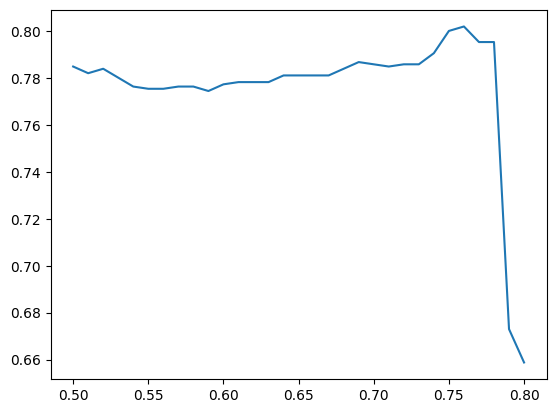

In [96]:
#sns.histplot(x=data['Accuracy'],y=data.index)
#sns.displot(data=data, x="Accuracy", y=data.index, kde=True)
#sns.displot(data=data['Accuracy'], x=data["Accuracy"].values, kde=True)
sns.lineplot(y=data['Accuracy'].values, x=data.index)
#sns.scatterplot(x=data.idxmax(), y=data['Accuracy'].max(), color='red')
